In [1]:
#@title Version 1.2 <br> 2nd training of the model1_Jan5

tokenizer_Jan5_v3

### imports and mounting drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir dataset
!ls

dataset  drive	sample_data


### Copy dataset

In [4]:

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_3.csv' /content/dataset/
! echo copied final_dataset_3


copied final_dataset_3


In [5]:
data = pd.read_csv('/content/dataset/final_dataset_3.csv')
data

,Language,Source
0,bash,foo a1 b2 b3 b4 ...\n\n
1,bash,unset\na\nb\nc\nMY_VARIABLE\nmake foo\nexport ...
2,bash,SUCCESS=false\nDEPLOY_PATH=/apps/jboss/server/...
3,bash,.bashrc\nhas_gitbranch() {\n if [ -e .git ]; ...
4,bash,foo foo scaffold_7 1 4845 6422 4845\...
...,...,...
44995,swift,@protocol ALAdLoadDelegate <NSObject>\n-(void)...
44996,swift,"func tableView(tableView: UITableView!, didSel..."
44997,swift,"override func touchesBegan(touches: NSSet, wi..."
44998,swift,override func viewDidLoad()\n{\n super.view...


#### describing dataset

Text(0.5, 1.0, 'Dataset')

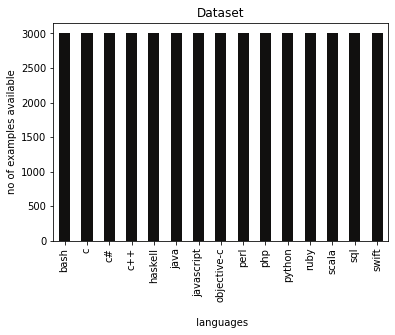

In [6]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [7]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [8]:
stopwords_list = stopwords.words('english')
print(len(stopwords_list))
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


179
185
192


### function to clean data

In [9]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)
def clean_code2(text):
  text = expression1(text)
  if len(text)>1001 or len(text)<9:
    return ''
  else:
    text_tokens = word_tokenize(text)
    tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
    return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [10]:
%%time

line_7210 = data.iloc[15710]['Source']
cleaned_7210 =  clean_code2(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


    String sql = "select distinct changeset " +
            "from Changeset changeset " +
            "join fetch changeset.changeEntries as changeEntry " +
            "join fetch changeEntry.repositoryEntity as repositoryEntity " +
            "join fetch repositoryEntity.repository as repository " +
            "where repository.connectionName = :connectionName";

public class Changeset {

    @NotNull
    @OneToMany(mappedBy="changeset", targetEntity=ChangeEntry.class, cascade={CascadeType.ALL }, fetch=FetchType.EAGER )
    private Set<IChangeEntry> changeEntries;

public class ChangeEntry {

    @NotNull
    @ManyToOne(targetEntity=Changeset.class)
    @ForeignKey(name="FkChangeEntryChangeset")
    private IScmChangeset changeset;

    @NotNull
    @ManyToOne(targetEntity=RepositoryEntity.class, cascade=CascadeType.ALL,fetch=FetchType.EAGER)
    @ForeignKey(name="FkChangeEntryRepoEntity")
    private IRepositoryEntity repositoryEntity;

 
 -> 956
----------------------------------

#### Cleaning dataset

In [11]:
%%time

dataset_refined = data.copy()
print('->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_3_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')

->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 34.3 s, sys: 59.9 ms, total: 34.4 s
Wall time: 34.4 s


In [12]:
df = pd.read_csv('/content/dataset/cleaned_data_3_v2.csv')
df

,Language,Source
0,bash,foo ...
1,bash,unset MY_VARIABLE make foo export MY_VARIABLE ...
2,bash,SUCCESS false DEPLOY_PATH apps jboss server de...
3,bash,.bashrc has_gitbranch ( ) .git ] ; GIT_BRANCH ...
4,bash,foo foo scaffold_ bar bar scaffold_ awk ' { ( ...
...,...,...
44995,swift,@ protocol ALAdLoadDelegate < NSObject > ( voi...
44996,swift,"func tableView ( tableView : UITableView ! , d..."
44997,swift,"override func touchesBegan ( touches : NSSet ,..."
44998,swift,override func viewDidLoad ( ) super.viewDidLoa...


In [13]:
len(df)

45000

In [16]:
cleaned_df = None
print(cleaned_df)
cleaned_df = df.dropna().copy()
print(len(cleaned_df))

None
44817


In [17]:
%%time

cleaned_df["lang_id"] = cleaned_df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = cleaned_df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',cleaned_df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 13.2 ms, sys: 1.99 ms, total: 15.2 ms
Wall time: 14.6 ms


In [18]:
cleaned_df

,Language,Source,lang_id
0,bash,foo ...,0
1,bash,unset MY_VARIABLE make foo export MY_VARIABLE ...,0
2,bash,SUCCESS false DEPLOY_PATH apps jboss server de...,0
3,bash,.bashrc has_gitbranch ( ) .git ] ; GIT_BRANCH ...,0
4,bash,foo foo scaffold_ bar bar scaffold_ awk ' { ( ...,0
...,...,...,...
44995,swift,@ protocol ALAdLoadDelegate < NSObject > ( voi...,14
44996,swift,"func tableView ( tableView : UITableView ! , d...",14
44997,swift,"override func touchesBegan ( touches : NSSet ,...",14
44998,swift,override func viewDidLoad ( ) super.viewDidLoa...,14


### copying tokenizer for converting sentences to sequences

In [19]:
# !cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/tokenizer_model4_v2.pickle' '/content/dataset'

!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/tokenizer_Jan5_v3.pickle' '/content/dataset'

!echo done

done


In [20]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"

print('loading pickle')
# loading
with open('/content/dataset/tokenizer_Jan5_v3.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print('loaded',type(tokenizer))

loading pickle
loaded <class 'keras_preprocessing.text.Tokenizer'>
CPU times: user 1.3 s, sys: 140 ms, total: 1.44 s
Wall time: 1.44 s


In [21]:
tokenizer

In [22]:
word_index = tokenizer.word_index
print('len of word index',len(word_index)) # should be 80...

len of word index 80691


### transform sentences using tokenizer

In [23]:
max_length = 1000
trunc_type='post'

In [24]:
%%time
print('converting whole data')
X = tokenizer.texts_to_sequences(cleaned_df['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X),'\n ')
print('-'*70)

converting whole data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
CPU times: user 5.43 s, sys: 1.68 s, total: 7.11 s
Wall time: 7.12 s


### pad sequences

In [25]:
%%time
X_padded = pad_sequences(X,maxlen=max_length, truncating=trunc_type)
print('sequence padded')
print(type(X_padded),'\n padded to ',X_padded.shape)

sequence padded
<class 'numpy.ndarray'> 
 padded to  (44817, 1000)
CPU times: user 358 ms, sys: 1.89 ms, total: 360 ms
Wall time: 363 ms


### Creating labels

In [26]:
Y = pd.get_dummies(cleaned_df['Language'].values.astype('U'))
print('and Y : ',type(Y))
y = np.asarray(Y)
print(X_padded.shape , y.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(44817, 1000) (44817, 15)


#### Train Test Split <br> this time using sklearn.model_selection train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
%%time
X_train, X_test, y_train, y_test = train_test_split( X_padded, y, test_size=0.33, random_state=42)

print('training data : ',X_train.shape , ' ... ', y_train.shape)
print('testing data : ',X_test.shape , ' ... ', y_test.shape)

training data :  (30027, 1000)  ...  (30027, 15)
testing data :  (14790, 1000)  ...  (14790, 15)
CPU times: user 59.9 ms, sys: 1.05 ms, total: 60.9 ms
Wall time: 61.2 ms


### Copy model

In [29]:
# !cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/model4_use_tokenizer4_v2.zip' '/content/dataset'
!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/Jan_5_DL_model1_v3.zip' '/content/dataset'
!echo copied

copied


### unzip

In [30]:
!unzip '/content/dataset/Jan_5_DL_model1_v3.zip'

Archive:  /content/dataset/Jan_5_DL_model1_v3.zip
   creating: content/content/Jan_5_DL_model1_v3/
  inflating: content/content/Jan_5_DL_model1_v3/saved_model.pb  
   creating: content/content/Jan_5_DL_model1_v3/assets/
   creating: content/content/Jan_5_DL_model1_v3/variables/
  inflating: content/content/Jan_5_DL_model1_v3/variables/variables.index  
  inflating: content/content/Jan_5_DL_model1_v3/variables/variables.data-00000-of-00001  


In [31]:
model_path = '/content/content/content/Jan_5_DL_model1_v3'


### Loading the model

In [32]:
%%time

from keras.models import load_model

model = load_model(model_path)
print('loaded')

loaded
CPU times: user 1.47 s, sys: 421 ms, total: 1.89 s
Wall time: 6.52 s


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [34]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=31)

In [35]:
k_fold

KFold(n_splits=10, random_state=31, shuffle=True)

### Training the model

In [36]:
%%time

scores = []
histories = []
print('......... fitting the model again\n')

for train_iX,test_iX in k_fold.split(X_train):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train[train_iX] , y_train[train_iX] , X_train[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = model.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = model.evaluate(X_test , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

......... fitting the model again

Epoch 1/10
423/423 [==============================] - 18s 23ms/step - loss: 1.2041 - accuracy: 0.6606 - val_loss: 1.8564 - val_accuracy: 0.5298
Epoch 2/10
423/423 [==============================] - 13s 31ms/step - loss: 1.1087 - accuracy: 0.6824 - val_loss: 0.9702 - val_accuracy: 0.7216
Epoch 3/10
423/423 [==============================] - 13s 30ms/step - loss: 1.0438 - accuracy: 0.6995 - val_loss: 1.0577 - val_accuracy: 0.7023
Epoch 4/10
423/423 [==============================] - 9s 20ms/step - loss: 1.0007 - accuracy: 0.7096 - val_loss: 1.1673 - val_accuracy: 0.6693
Epoch 5/10
423/423 [==============================] - 9s 22ms/step - loss: 0.9741 - accuracy: 0.7198 - val_loss: 1.8155 - val_accuracy: 0.5268
Epoch 6/10
423/423 [==============================] - 11s 27ms/step - loss: 0.9502 - accuracy: 0.7283 - val_loss: 1.2484 - val_accuracy: 0.6464
Epoch 7/10
423/423 [==============================] - 9s 20ms/step - loss: 0.9253 - accuracy: 0.7326 - 

In [37]:
print('saving model...')
model.save('content/Jan_5_DL_model1_v3_2ndTraining')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/Jan_5_DL_model1_v3_2ndTraining/assets
saved


In [38]:
!zip -r /content/Jan_5_DL_model1_v3_2ndTraining.zip /content/content/Jan_5_DL_model1_v3_2ndTraining

  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/ (stored 0%)
  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/saved_model.pb (deflated 89%)
  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/assets/ (stored 0%)
  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/variables/ (stored 0%)
  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/variables/variables.index (deflated 68%)
  adding: content/content/Jan_5_DL_model1_v3_2ndTraining/variables/variables.data-00000-of-00001 (deflated 13%)


In [39]:
!cp '/content/Jan_5_DL_model1_v3_2ndTraining.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done

done


In [40]:
acc = []
for i in range(10):
  acc.extend(histories[i].history['accuracy'])
print(len(acc))

100


In [41]:
val_acc = []
for i in range(10):
  val_acc.extend(histories[i].history['val_accuracy'])
print(len(val_acc))

100


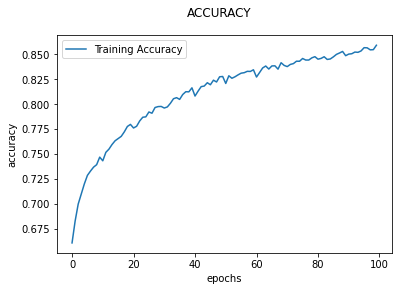

In [43]:
plt.plot([i for i in range(0,len(acc))] ,acc,label='Training Accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('ACCURACY')
plt.legend()

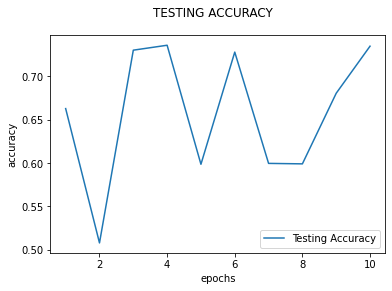

In [44]:
plt.plot([i for i in range(1,len(scores)+1)] , scores,label='Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TESTING ACCURACY')
plt.legend()

In [46]:
acc[0] , acc[-1]

(0.6605609655380249, 0.8588714003562927)

In [47]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [50]:
%%time
predictions_1 = model.predict(X_test)
print('done predicting on test data')
print(type(predictions_1) , predictions_1.shape)


done predicting on test data
<class 'numpy.ndarray'> (14790, 15)
CPU times: user 1.02 s, sys: 77.1 ms, total: 1.1 s
Wall time: 914 ms


In [51]:
y_test.shape

(14790, 15)

In [53]:
actual = np.argmax(y_test,axis=1)
actual.shape

(14790,)

In [54]:
first_preds = np.argmax(predictions_1,axis=1)
first_preds.shape

(14790,)

In [56]:
print('\n','-'*50,'\n')
cnf_matrix1 = confusion_matrix(actual, first_preds)
print(cnf_matrix1)


 -------------------------------------------------- 

[[839  10  10   8   4  19   5   2  37  32  19  22   2  10   3]
 [ 55 735  12 103   4  23   4   7  28  17   7   5   3   6   4]
 [ 48  17 631  37   7 108  38   4  18  32   8  13   6  41   3]
 [ 46  91  13 662   5  48   8   8  17  11  17   9   1   4   4]
 [ 59   6   6  28 771  35   9   1  21  14  12   8   9  12  14]
 [ 64   7  50  24   8 684  10   7  15  28   6  12  21  15   0]
 [ 65   6  22   5   2  21 734   0  27  54  11  12   2  18  13]
 [ 53  17  10  24   3  24   5 781   3  11   1   8   0   4  21]
 [111  12   3  16   6  37  15   2 673  52  23  19   6  15   4]
 [ 81   6   8  10   5  34  39   2  38 663  11  15   4  33   3]
 [ 98  12   9  13   9  34  12   7  54  47 657  40  12  21   1]
 [ 66   8   7   9   8  35  16   3  35  44  34 634  10  17   4]
 [ 31   3  11  12  11  62   7   0   8  15  18  16 788   6   5]
 [ 52   3  25   7   3  26   1   4  21  60   8  22   2 772   1]
 [ 28   2   7   9   3  14   6  54   2   6   4   3   4   2 841]]

In [57]:
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [58]:
langs = [i for i in data.Language.unique()]
langs.sort()
langs

['bash',
 'c',
 'c#',
 'c++',
 'haskell',
 'java',
 'javascript',
 'objective-c',
 'perl',
 'php',
 'python',
 'ruby',
 'scala',
 'sql',
 'swift']

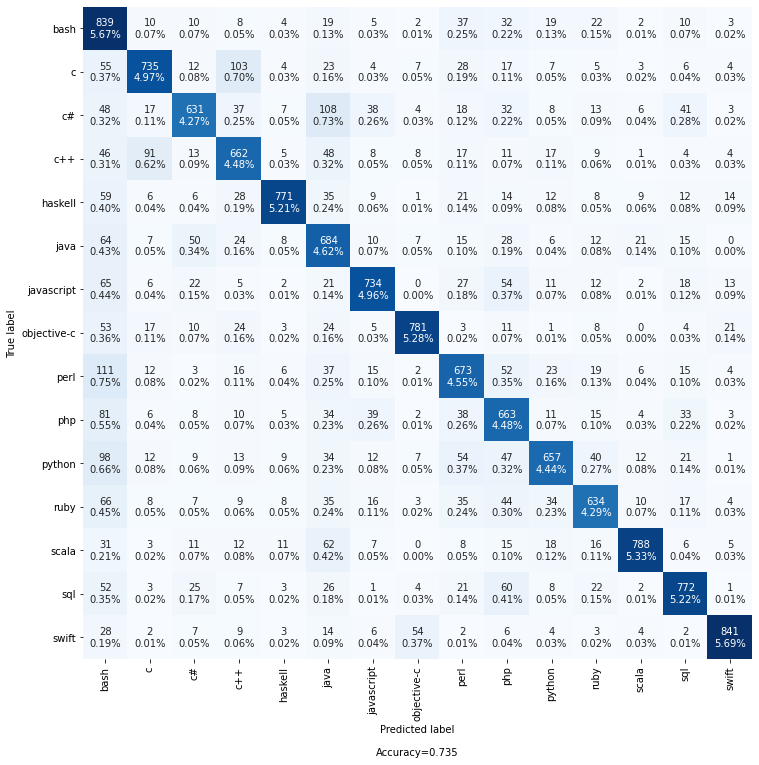

In [59]:
# make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False )
make_confusion_matrix(cnf_matrix1, figsize=(12,12), cbar=False ,categories=langs)


In [60]:
from sklearn.metrics import precision_recall_fscore_support as score


In [63]:
def print_metrics(predictions):
  precision , recall , fscore , support = score( actual, predictions)
  print('-'*80)
  print('{:10}\t | {:7}\t |  {:12}|\t{}'.format('   Language','  Precision',' Recall',' F1 Measure'))
  print('-'*80)
  for i in range(len(langs)):
    
    result = '{:10}\t |{:13.5}\t |{:10.5}\t|\t{:10.5}'.format(str('   '+langs[i]),precision[i],recall[i],fscore[i])
    print(result,end='\n')
    print('-'*80)


In [64]:
print_metrics(first_preds)


--------------------------------------------------------------------------------
   Language	 |   Precision	 |   Recall     |	 F1 Measure
--------------------------------------------------------------------------------
   bash   	 |      0.49469	 |   0.82094	|	   0.61737
--------------------------------------------------------------------------------
   c      	 |       0.7861	 |   0.72557	|	   0.75462
--------------------------------------------------------------------------------
   c#     	 |      0.76578	 |   0.62413	|	   0.68774
--------------------------------------------------------------------------------
   c++    	 |      0.68459	 |   0.70127	|	   0.69283
--------------------------------------------------------------------------------
   haskell	 |      0.90813	 |   0.76716	|	   0.83172
--------------------------------------------------------------------------------
   java   	 |      0.56811	 |   0.71924	|	    0.6348
----------------------------------------------------------